In [16]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
from matplotlib import pyplot as plt
plt.style.use('ggplot')


In [18]:
cars = pd.read_csv('cars_df.csv')
cars['Year_model'] = pd.to_numeric(cars.Year_model)
cars['Age'] = 2020- cars['Year_model'] 

In [8]:
cars.isnull().sum(axis=0)

Listing           0
Make              0
Year_model        0
Price             0
Milage            3
Exterior_color    0
Interior_color    0
Transmission      0
Drivetrain        0
City              0
dtype: int64

In [9]:
city = pd.read_csv('city_coefs.csv')

In [11]:
city['test']= city['Age_coef']*5 + city['Milage_coef']*100000 + city['Intercept']

In [13]:
city['Milage.thousand'] = city['Milage_coef']*1000

In [14]:
city

,City,Age_coef,Milage_coef,Intercept,test,Milage.thousand
0,New York City,-777.712129,-0.115805,29201.077749,13732.011977,-115.805051
1,San Francisco,-159.345020,-0.166636,30762.204573,13301.872816,-166.636067
2,Chicago,-667.349396,-0.128510,29698.595203,13510.819130,-128.510291
3,Houston,-701.304812,-0.110012,28847.600373,14339.833768,-110.012425
4,Los Angeles,-460.649581,-0.131710,27396.547445,11922.340846,-131.709587
5,Seattle,-647.000461,-0.128705,31665.397448,15559.935049,-128.704601
6,Boston,-938.698094,-0.120271,31164.947382,14444.370913,-120.270860
7,Miami,-318.353330,-0.150064,26594.513730,9996.373662,-150.063734


In [ ]:
age_ = cars.iloc[:,[1,10]]
cars['Age'].plot(kind='bar')

In [29]:
import seaborn as sns

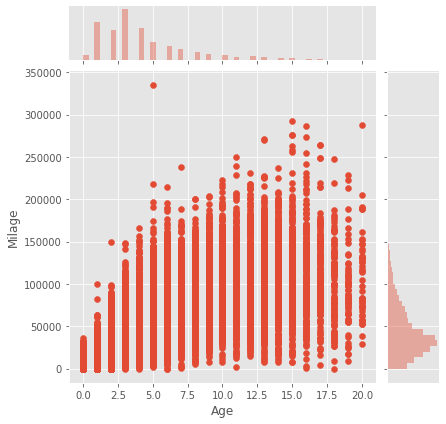

In [30]:
sns.jointplot(cars['Age'], cars['Milage'])

In [34]:
fit = plt.figure()
sns.factorplot(x = 'Age',hue ='Make', data= cars, kind= 'hist')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Plot kind 'hist' is not recognized

<Figure size 432x288 with 0 Axes>

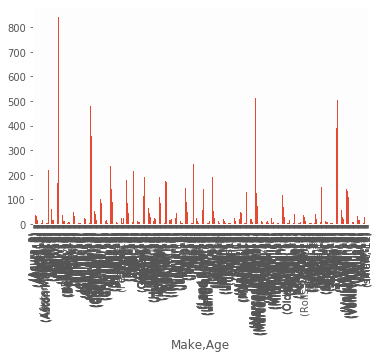

In [44]:
cars.groupby(['Make','Age']).count()['Listing'].plot(kind='bar')


In [45]:
cars.Make.unique()

array(['INFINITI', 'Suzuki', 'Honda', 'Cadillac', 'Land Rover', 'Nissan',
       'Mazda', 'BMW', 'Toyota', 'Saturn', 'GMC', 'Chevrolet', 'Bentley',
       'Mercury', 'Hyundai', 'Ford', 'Aston Martin', 'Chrysler', 'Acura',
       'Kia', 'Mercedes-Benz', 'Audi', 'Dodge', 'MINI', 'Jaguar',
       'Mitsubishi', 'Tesla', 'Volkswagen', 'Buick', 'RAM', 'Saab',
       'Volvo', 'Subaru', 'Lexus', 'Pontiac', 'Lotus', 'Maserati',
       'Lincoln', 'Scion', 'Genesis', 'FIAT', 'Jeep', 'Porsche', 'Hummer',
       'smart', 'Ferrari', 'Alfa', 'Fisker', 'Oldsmobile', 'Rolls-Royce'],
      dtype=object)

In [58]:
luxury = ['INFINITI','Cadillac','Land Rover','BMW','GMC','Bentley','Aston Martin','Mercedes-Benz','Audi',
         'Jaguar','Tesla','Buick','Saab','Lexus','Lotus','Maserati','Lincoln','Genesis','FIAT','Porsche','Hummer',
          'Ferrari','Fisker','Rolls-Royce']

makes___ = ['INFINITI', 'Suzuki', 'Honda', 'Cadillac', 'Land Rover', 'Nissan',
       'Mazda', 'BMW', 'Toyota', 'Saturn', 'GMC', 'Chevrolet', 'Bentley',
       'Mercury', 'Hyundai', 'Ford', 'Aston Martin', 'Chrysler', 'Acura',
       'Kia', 'Mercedes-Benz', 'Audi', 'Dodge', 'MINI', 'Jaguar',
       'Mitsubishi', 'Tesla', 'Volkswagen', 'Buick', 'RAM', 'Saab',
       'Volvo', 'Subaru', 'Lexus', 'Pontiac', 'Lotus', 'Maserati',
       'Lincoln', 'Scion', 'Genesis', 'FIAT', 'Jeep', 'Porsche', 'Hummer',
       'smart', 'Ferrari', 'Alfa', 'Fisker', 'Oldsmobile', 'Rolls-Royce']

luxury_df = pd.DataFrame(luxury)
luxury_df['Category'] = 'Luxury Brand'
luxury_df = luxury_df.rename(columns={0:'Make'})

In [67]:
cars2 = pd.merge(cars, luxury_df, how = 'left', on = 'Make')
cars2['Category'] = cars2.Category.fillna('Non-Luxury Brand')
cars2

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age,Category
0,2013 INFINITI JX35 Base,INFINITI,2013,13888.0,73953.0,White,Brown,CVT,AWD,New York City,7,Luxury Brand
1,2006 Suzuki Grand Vitara,Suzuki,2006,3995.0,121390.0,Red,Gray,Automatic,4x4/4-wheel drive,New York City,14,Non-Luxury Brand
2,2012 INFINITI FX50 Base,INFINITI,2012,13995.0,101158.0,Black,Black,Automatic,AWD,New York City,8,Luxury Brand
3,2012 Honda Odyssey EX-L,Honda,2012,10900.0,57070.0,Black,Gray,Automatic,FWD,New York City,8,Non-Luxury Brand
4,2012 INFINITI QX56 Base,INFINITI,2012,13495.0,137301.0,Silver,Gray,Automatic,4x4/4-wheel drive,New York City,8,Luxury Brand
...,...,...,...,...,...,...,...,...,...,...,...,...
38626,2016 Nissan Juke SL,Nissan,2016,15446.0,49293.0,Black,Black,CVT,AWD,Miami,4,Non-Luxury Brand
38627,2017 Ford Escape SE,Ford,2017,13990.0,31252.0,White,Gray,Automatic,FWD,Miami,3,Non-Luxury Brand
38628,2019 Volkswagen Atlas 3.6L V6 SE,Volkswagen,2019,25950.0,15349.0,Black,Black,Automatic,FWD,Miami,1,Non-Luxury Brand
38629,2015 Chevrolet Equinox 1LT,Chevrolet,2015,6590.0,140410.0,Black,Black,Automatic,FWD,Miami,5,Non-Luxury Brand


In [69]:
cars2.isnull().sum(axis =0)
cars2.reset_index(drop = True)

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age,Category
0,2013 INFINITI JX35 Base,INFINITI,2013,13888.0,73953.0,White,Brown,CVT,AWD,New York City,7,Luxury Brand
1,2006 Suzuki Grand Vitara,Suzuki,2006,3995.0,121390.0,Red,Gray,Automatic,4x4/4-wheel drive,New York City,14,Non-Luxury Brand
2,2012 INFINITI FX50 Base,INFINITI,2012,13995.0,101158.0,Black,Black,Automatic,AWD,New York City,8,Luxury Brand
3,2012 Honda Odyssey EX-L,Honda,2012,10900.0,57070.0,Black,Gray,Automatic,FWD,New York City,8,Non-Luxury Brand
4,2012 INFINITI QX56 Base,INFINITI,2012,13495.0,137301.0,Silver,Gray,Automatic,4x4/4-wheel drive,New York City,8,Luxury Brand
...,...,...,...,...,...,...,...,...,...,...,...,...
38626,2016 Nissan Juke SL,Nissan,2016,15446.0,49293.0,Black,Black,CVT,AWD,Miami,4,Non-Luxury Brand
38627,2017 Ford Escape SE,Ford,2017,13990.0,31252.0,White,Gray,Automatic,FWD,Miami,3,Non-Luxury Brand
38628,2019 Volkswagen Atlas 3.6L V6 SE,Volkswagen,2019,25950.0,15349.0,Black,Black,Automatic,FWD,Miami,1,Non-Luxury Brand
38629,2015 Chevrolet Equinox 1LT,Chevrolet,2015,6590.0,140410.0,Black,Black,Automatic,FWD,Miami,5,Non-Luxury Brand


In [70]:
cars2.to_csv('cars2_df.csv')

In [102]:
cars2.groupby('Category').mean()['Age']

Category
Luxury Brand        4.602497
Non-Luxury Brand    4.405464
Name: Age, dtype: float64

In [76]:
cars2.groupby('Category').count()

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age
Category,,,,,,,,,,,
Luxury Brand,13376,13376,13376,13376,13374,13376,13376,13376,13376,13376,13376
Non-Luxury Brand,25255,25255,25255,25255,25254,25255,25255,25255,25255,25255,25255


In [79]:
cars2.groupby(['City','Category']).count()

Listing  Make  Year_model  Price  Milage  \
City          Category                                                     
Boston        Luxury Brand         1613  1613        1613   1613    1613   
              Non-Luxury Brand     3387  3387        3387   3387    3387   
Chicago       Luxury Brand         1690  1690        1690   1690    1690   
              Non-Luxury Brand     3210  3210        3210   3210    3209   
Houston       Luxury Brand         1655  1655        1655   1655    1655   
              Non-Luxury Brand     3276  3276        3276   3276    3276   
Los Angeles   Luxury Brand         1753  1753        1753   1753    1752   
              Non-Luxury Brand     3247  3247        3247   3247    3247   
Miami         Luxury Brand         1601  1601        1601   1601    1601   
              Non-Luxury Brand     3399  3399        3399   3399    3399   
New York City Luxury Brand         1508  1508        1508   1508    1508   
              Non-Luxury Brand     2392  2392        2392   2392    2392   
San Francisco Luxury Brand         1961  1961        1961   1961    1960   
              Non-Luxury Brand     2939  2939        2939   2939    2939   
Seattle       Luxury Brand         1595  1595        1595   1595    1595   
              Non-Luxury Brand     3405  3405        3405   3405    3405   

                                Exterior_color  Interior_color  Transmission  \
City          Category                                                         
Boston        Luxury Brand                1613            1613          1613   
              Non-Luxury Brand            3387            3387          3387   
Chicago       Luxury Brand                1690            1690          1690   
              Non-Luxury Brand            3210            3210          3210   
Houston       Luxury Brand                1655            1655          1655   
              Non-Luxury Brand            3276            3276          3276   
Los Angeles   Luxury Brand                1753            1753          1753   
              Non-Luxury Brand            3247            3247          3247   
Miami         Luxury Brand                1601            1601          1601   
              Non-Luxury Brand            3399            3399          3399   
New York City Luxury Brand                1508            1508          1508   
              Non-Luxury Brand            2392            2392          2392   
San Francisco Luxury Brand                1961            1961          1961   
              Non-Luxury Brand            2939            2939          2939   
Seattle       Luxury Brand                1595            1595          1595   
              Non-Luxury Brand            3405            3405          3405   

                                Drivetrain   Age  
City          Category                            
Boston        Luxury Brand            1613  1613  
              Non-Luxury Brand        3387  3387  
Chicago       Luxury Brand            1690  1690  
              Non-Luxury Brand        3210  3210  
Houston       Luxury Brand            1655  1655  
              Non-Luxury Brand        3276  3276  
Los Angeles   Luxury Brand            1753  1753  
              Non-Luxury Brand        3247  3247  
Miami         Luxury Brand            1601  1601  
              Non-Luxury Brand        3399  3399  
New York City Luxury Brand            1508  1508  
              Non-Luxury Brand        2392  2392  
San Francisco Luxury Brand            1961  1961  
              Non-Luxury Brand        2939  2939  
Seattle       Luxury Brand            1595  1595  
              Non-Luxury Brand        3405  3405

In [80]:
len(luxury)

24

In [89]:
cars2.groupby('Category').mean()['Age']

Category
Luxury Brand        4.602497
Non-Luxury Brand    4.405464
Name: Age, dtype: float64

In [86]:
cars2.groupby('City').mean()['Milage']

City
Boston           47378.798600
Chicago          50526.171055
Houston          51767.101805
Los Angeles      49704.301260
Miami            41660.053800
New York City    51295.971795
San Francisco    41136.803633
Seattle          55376.960800
Name: Milage, dtype: float64

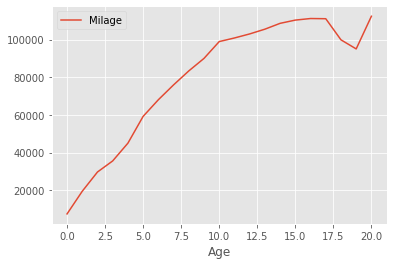

In [103]:
cars2.groupby('Age').mean().reset_index(drop=False).plot.line(x = 'Age',y='Milage')

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age,Category
0,2013 INFINITI JX35 Base,INFINITI,2013,13888.0,73953.0,White,Brown,CVT,AWD,New York City,7,Luxury Brand
1,2006 Suzuki Grand Vitara,Suzuki,2006,3995.0,121390.0,Red,Gray,Automatic,4x4/4-wheel drive,New York City,14,Non-Luxury Brand
2,2012 INFINITI FX50 Base,INFINITI,2012,13995.0,101158.0,Black,Black,Automatic,AWD,New York City,8,Luxury Brand
3,2012 Honda Odyssey EX-L,Honda,2012,10900.0,57070.0,Black,Gray,Automatic,FWD,New York City,8,Non-Luxury Brand
4,2012 INFINITI QX56 Base,INFINITI,2012,13495.0,137301.0,Silver,Gray,Automatic,4x4/4-wheel drive,New York City,8,Luxury Brand
...,...,...,...,...,...,...,...,...,...,...,...,...
38626,2016 Nissan Juke SL,Nissan,2016,15446.0,49293.0,Black,Black,CVT,AWD,Miami,4,Non-Luxury Brand
38627,2017 Ford Escape SE,Ford,2017,13990.0,31252.0,White,Gray,Automatic,FWD,Miami,3,Non-Luxury Brand
38628,2019 Volkswagen Atlas 3.6L V6 SE,Volkswagen,2019,25950.0,15349.0,Black,Black,Automatic,FWD,Miami,1,Non-Luxury Brand
38629,2015 Chevrolet Equinox 1LT,Chevrolet,2015,6590.0,140410.0,Black,Black,Automatic,FWD,Miami,5,Non-Luxury Brand
